In [10]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from shutil import rmtree
import os
from os import listdir
from os import remove

face_cascade = cv2.CascadeClassifier('gui/assets/haarcascade_frontalface_default.xml')

In [3]:

train = glob.glob("data/CK+/*/*.png")


In [15]:
borrar = glob.glob("data/fer/train/disgust/*.*")
borrar = [x.split("/")[4] for x in borrar]

In [16]:
path = "data/all/test/anger/"
for item in borrar:
    try:
        remove(f"{path}{item}")
    except:
        print(item)

Training_11660541.jpg
Training_10598340.jpg
Training_57993537.jpg
Training_7602986.jpg
Training_12122862.jpg
Training_5387344.jpg
Training_76379398.jpg
facesdisgust11.png
Training_19204784.jpg
Training_88435647.jpg
Training_34358742.jpg
disgust148.png
facesdisgust1.png
Training_67085421.jpg
Training_59432375.jpg
Training_99747227.jpg
Training_96306068.jpg
Training_46951397.jpg
Training_84557608.jpg
Training_8819879.jpg
Training_84702718.jpg
Training_57040428.jpg
Training_52480931.jpg
Training_21936703.jpg
Training_41474720.jpg
Training_73800560.jpg
Training_33820609.jpg
Training_7975772.jpg
Training_94109747.jpg
Training_56563857.jpg
Training_47680332.jpg
Training_27574839.jpg
Training_88580213.jpg
Training_97741852.jpg
Training_85886105.jpg
Training_59250682.jpg
Training_67888404.jpg
Training_96698508.jpg
disgust151.png
Training_99947220.jpg
Training_66197221.jpg
Training_35846483.jpg
Training_38147790.jpg
Training_40146926.jpg
Training_95344687.jpg
Training_20381848.jpg
Training_1770

In [5]:
len(borrar)

111

In [75]:
train


['data/CK+/surprise/S052_001_00000015.png',
 'data/CK+/surprise/S050_002_00000018.png',
 'data/CK+/surprise/S086_001_00000019.png',
 'data/CK+/surprise/S037_001_00000020.png',
 'data/CK+/surprise/S034_001_00000029.png',
 'data/CK+/surprise/S135_001_00000039.png',
 'data/CK+/surprise/S133_009_00000006.png',
 'data/CK+/surprise/S089_001_00000016.png',
 'data/CK+/surprise/S044_001_00000024.png',
 'data/CK+/surprise/S075_002_00000014.png',
 'data/CK+/surprise/S073_001_00000013.png',
 'data/CK+/surprise/S058_001_00000020.png',
 'data/CK+/surprise/S063_001_00000013.png',
 'data/CK+/surprise/S131_001_00000016.png',
 'data/CK+/surprise/S124_001_00000014.png',
 'data/CK+/surprise/S092_001_00000017.png',
 'data/CK+/surprise/S097_001_00000021.png',
 'data/CK+/surprise/S076_001_00000017.png',
 'data/CK+/surprise/S080_001_00000018.png',
 'data/CK+/surprise/S113_001_00000012.png',
 'data/CK+/surprise/S010_002_00000014.png',
 'data/CK+/surprise/S115_001_00000008.png',
 'data/CK+/surprise/S100_002_000

In [76]:
images = {
    "train":{},
    "test":{}
}

In [77]:

for path in train:
    person = path.split("/")[2]
    images["train"][person] = images["train"].get(person,[]) + [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)]

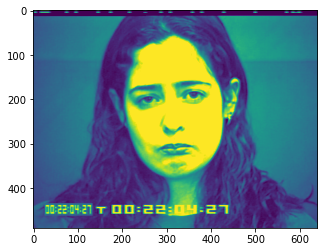

In [78]:

img = images["train"]["sadness"][0]
plt.imshow(img)

In [79]:
y_=[]
x_=[]
for typ, collection in images.items():
    for name, photos in collection.items():
        for img in photos:
            for coord in face_cascade.detectMultiScale(img, 1.3, 5):
                y_.append(name)
                x, y, w, h = coord
                x_.append(img[y:y+h, x:x+w])

In [80]:
x_

[array([[103, 103, 103, ..., 129, 130, 128],
        [ 99,  98,  97, ..., 122, 123, 122],
        [103, 103, 102, ..., 126, 125, 125],
        ...,
        [ 69,  69,  71, ...,  66,  68,  68],
        [ 69,  69,  75, ...,  64,  60,  61],
        [ 69,  69,  70, ...,  71,  69,  66]], dtype=uint8),
 array([[ 92,  94,  95, ..., 100,  98,  98],
        [ 91,  93,  94, ...,  95,  96,  95],
        [ 90,  90,  91, ...,  96, 100,  99],
        ...,
        [ 65,  65,  64, ...,  70,  72,  71],
        [ 66,  66,  66, ...,  67,  69,  68],
        [ 65,  65,  65, ...,  66,  67,  66]], dtype=uint8),
 array([[108, 109, 111, ..., 154, 152, 152],
        [111, 112, 109, ..., 159, 156, 154],
        [110, 112, 109, ..., 155, 153, 152],
        ...,
        [ 22,  25,  36, ...,  63,  59,  56],
        [ 28,  32,  33, ...,  73,  66,  58],
        [ 23,  25,  33, ...,  77,  71,  61]], dtype=uint8),
 array([[199, 199, 198, ..., 186, 186, 186],
        [199, 199, 199, ..., 194, 194, 194],
        [198, 19

In [81]:
path = "data/CK_cut/"
for item in listdir(path):
    print(item)
    rmtree(f"{path}{item}")
    
categories = ['sadness', 'happiness', 'anger', 'disgust', 'neutral','surprise', 'fear']
for cat in categories:
    os.mkdir(f'{path}{cat}')

surprise
disgust
anger
neutral
happiness
fear
sadness


In [82]:
for i in range(len(y_)):
    cv2.imwrite(f'data/CK_cut/{y_[i]}/{y_[i]}{i}.png',x_[i])